In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

In [2]:
mean = 0
sd = 0.2
given_w0 = 0.5
given_w1 = -0.3
n = 10

In [3]:
x_pure = np.linspace(-1, 1, n)
noise = np.random.normal(mean, 0.2, 10)
x_noise = x_pure + noise
x_noise

array([-0.8922443 , -0.8567962 , -0.43065061, -0.17911769, -0.18043962,
        0.01802963,  0.69419438,  0.98086463,  0.67069951,  1.11069379])

In [4]:
def get_y(x):
    y = given_w0*x + given_w1
    return y

In [5]:
y = get_y(x_pure)
y

array([-0.8       , -0.68888889, -0.57777778, -0.46666667, -0.35555556,
       -0.24444444, -0.13333333, -0.02222222,  0.08888889,  0.2       ])

Text(0, 0.5, 'Y')

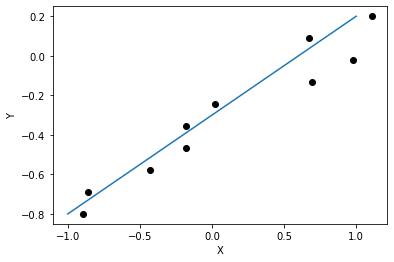

In [6]:
plt.scatter(x_noise, y, color='black')
plt.plot(x_pure, y)
plt.xlabel('X')
plt.ylabel('Y')

In [7]:
def get_linear(x, w0, w1):
    return w0 + w1*x

In [8]:
def gaussian(x, y, w0, w1):
    return sqrt(np.pi * 2) * sd * np.exp(-0.5 * ((y - get_linear(x, w0, w1))/sd) ** 2)

In [50]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

In [51]:
# w0.shape
# Prior Info
mu = 0
sigma = 0.5

In [52]:
grid_0 = norm.pdf(w0, mu, sqrt(sigma))
grid_1 = norm.pdf(w1, mu, sqrt(sigma))

In [53]:
# plt.plot(grid_0)
grid_0.shape

(100, 100)

In [54]:
prior = grid_0*grid_1

In [55]:
prior.shape

(100, 100)

Text(0, 0.5, 'w1')

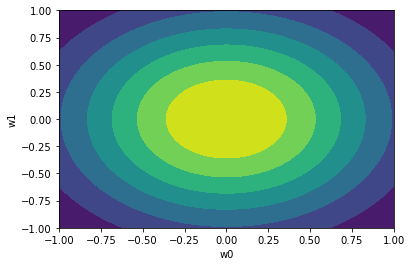

In [56]:
plt.contourf(w0, w1, prior)
plt.xlabel('w0')
plt.ylabel('w1')

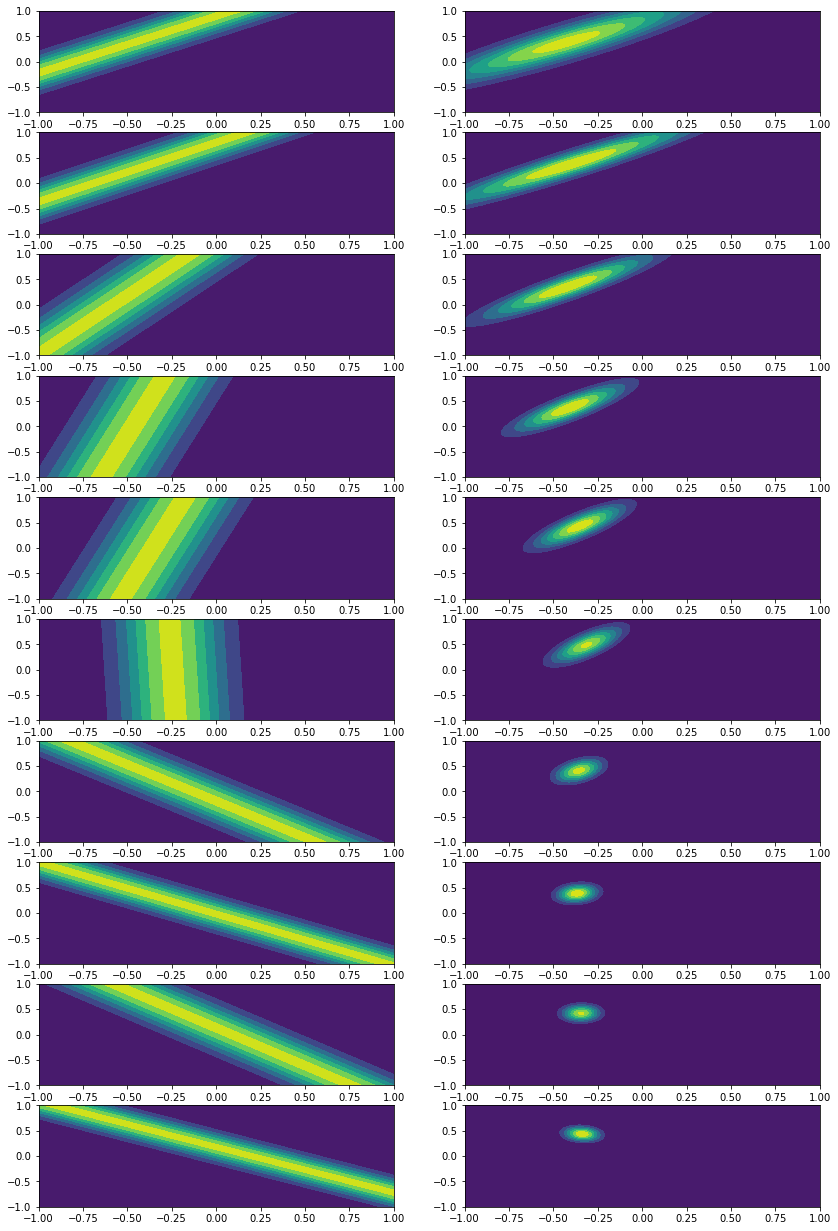

In [58]:
fig, axs = plt.subplots(10, 2, figsize=(14, 22))
count = 0
for i, j in zip(x_noise, y):
    mle = gaussian(i, j, w0, w1)
    posterior = prior * mle
    prior = posterior
    axs[count, 0].contourf(w0, w1, mle)
    axs[count, 1].contourf(w0, w1, posterior)
    count += 1